# Aula 8 - Time Series

### Objetivos
Desenvolver o embasamento conceitual e em programação para analisar uma série temporal.

`!pip install pandas-datareader`

`!pip install requests`  
`!pip install yfinance`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import datetime as dt
import requests

In [2]:
# para ignorar warnings
warnings.filterwarnings('ignore')

# Datetime

## Relembrando como trabalhar com dados temporais!

In [4]:
# 1
hoje_str = '08/11/2021'
ontem_str = '07/11/2021'

In [5]:
type(hoje_str)

str

In [6]:
hoje_dt = dt.date(2021, 11, 8)

In [7]:
hoje_dt

datetime.date(2021, 11, 8)

In [12]:
print(f'''
Dt: {hoje_dt} {type(hoje_dt)}
str: {hoje_str} {type(hoje_str)}''')


Dt: 2021-11-08 <class 'datetime.date'>
str: 08/11/2021 <class 'str'>


In [13]:
hoje_dt - dt.timedelta(days=1)

datetime.date(2021, 11, 7)

In [14]:
hoje_dt - dt.timedelta(weeks=1)

datetime.date(2021, 11, 1)

In [15]:
# 4
# hora
horario_str = '19:19:00'
horario_dt = dt.time(19,20,0)

In [16]:
print(f'''
Dt: {horario_dt} {type(horario_dt)}
str: {horario_str} {type(horario_str)}''')


Dt: 19:20:00 <class 'datetime.time'>
str: 19:19:00 <class 'str'>


In [18]:
# datetime

datetime_str = '08/11/2021 19:19:00'
datetime_dt = dt.datetime(2021,11,8,19,21,0)

In [ ]:
print(f'''
Dt: {horario_dt} {type(horario_dt)}
str: {horario_str} {type(horario_str)}''')


In [21]:
# 8
print(f'''
ano: {datetime_dt.year}
mes: {datetime_dt.month}
dia: {datetime_dt.day}
segundo: {datetime_dt.second}
data: {datetime_dt.date()}
horario: {datetime_dt.time()}
''')


ano: 2021
mes: 11
dia: 8
segundo: 0
data: 2021-11-08
horario: 19:21:00



In [32]:
# 9
amanha = dt.datetime(2021,11,9,1,2,3)


In [33]:
# 10
dt.datetime.isoweekday(hoje_dt - dt.timedelta(1))

7

In [34]:
(hoje_dt - dt.timedelta(1)).weekday()

6

In [35]:
dt.datetime.isoformat(amanha)

'2021-11-09T01:02:03'

In [36]:
dt.datetime.today()

datetime.datetime(2021, 11, 8, 19, 30, 31, 16287)

In [37]:
dt.datetime.now()

datetime.datetime(2021, 11, 8, 19, 32, 58, 584032)

In [39]:
# 11
# strftime => datetime para str
# formatação de string em data
dt.datetime.strftime(amanha, format='%d/%m/%y')

'09/11/21'

In [ ]:
dt.datetime.strftime(amanha, format='%d/%m/%y')

In [42]:
# 12
# strptime => datetime para str
# formatação de string em data
dt.datetime.strptime(hoje_str, '%d/%m/%Y')

datetime.datetime(2021, 11, 8, 0, 0)

In [ ]:
dt.datetime.strptime('10 de January')

In [ ]:
# 13

# Capturando dados financeiros

## Via requests (Introdução a dados financeiros)

https://finance.yahoo.com/

In [44]:
import yfinance as yf

In [62]:
# 14
df_mg = yf.download('MGLU3.SA', start='2017-01-01')

[*********************100%***********************]  1 of 1 completed


In [63]:
# 15
df_mg.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1203.000000,1203.000000,1203.000000,1203.000000,1203.000000,1.203000e+03
mean,9.907792,10.098793,9.697087,9.896960,9.787248,4.429698e+07
std,8.168601,8.312256,8.005448,8.156113,8.175088,2.727965e+07
min,0.369531,0.382812,0.367851,0.367851,0.351092,0.000000e+00
25%,2.853594,2.906250,2.810313,2.860156,2.759503,2.730230e+07
50%,6.093750,6.212500,5.989062,6.085625,5.920398,3.823400e+07
75%,17.546249,17.915000,17.182500,17.445001,17.355526,5.304500e+07
max,28.150000,28.309999,26.740000,27.450001,27.401571,3.612832e+08


In [64]:
# 16
df_mg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1203 entries, 2017-01-02 to 2021-11-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1203 non-null   float64
 1   High       1203 non-null   float64
 2   Low        1203 non-null   float64
 3   Close      1203 non-null   float64
 4   Adj Close  1203 non-null   float64
 5   Volume     1203 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 65.8 KB


<AxesSubplot:xlabel='Date'>

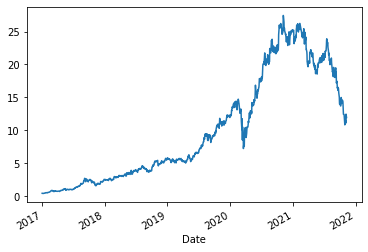

In [65]:
# 17
df_mg.Close.plot()

<AxesSubplot:xlabel='Date'>

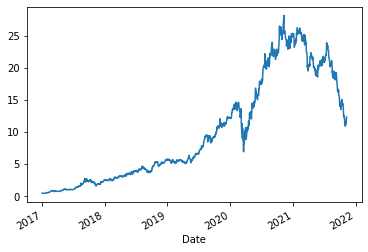

In [66]:
# 18
df_mg.Open.plot()

In [ ]:
# 19
df_mg.Open.plot(label='Abertura')
df_mg.Close.plot()

In [67]:
# 20
df_mg_bk = df_mg.copy()

In [68]:
# 21
df_mg_bk.index = df_mg_bk.reset_index().Date.dt.strftime('%Y-%m-%d')

In [69]:
# 22
df_mg.index

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06', '2017-01-09', '2017-01-10', '2017-01-11',
               '2017-01-12', '2017-01-13',
               ...
               '2021-10-25', '2021-10-26', '2021-10-27', '2021-10-28',
               '2021-10-29', '2021-11-01', '2021-11-03', '2021-11-04',
               '2021-11-05', '2021-11-08'],
              dtype='datetime64[ns]', name='Date', length=1203, freq=None)

In [70]:
# 23
df_mg_bk.index

Index(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12', '2017-01-13',
       ...
       '2021-10-25', '2021-10-26', '2021-10-27', '2021-10-28', '2021-10-29',
       '2021-11-01', '2021-11-03', '2021-11-04', '2021-11-05', '2021-11-08'],
      dtype='object', name='Date', length=1203)

In [71]:
# 24
df_mg['2021']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,25.260000,25.580000,24.870001,25.200001,25.181740,25706100
2021-01-05,25.100000,25.180000,24.340000,24.760000,24.742058,25431900
2021-01-06,24.650000,24.660000,23.420000,23.459999,23.442999,51799000
2021-01-07,23.639999,23.850000,22.950001,23.160000,23.143217,42146600
2021-01-08,23.190001,24.299999,23.020000,23.840000,23.822723,43988100
...,...,...,...,...,...,...
2021-11-01,10.870000,11.430000,10.860000,11.300000,11.300000,31309000
2021-11-03,11.190000,11.670000,10.990000,11.550000,11.550000,47660400
2021-11-04,11.500000,11.820000,10.930000,11.080000,11.080000,34112300


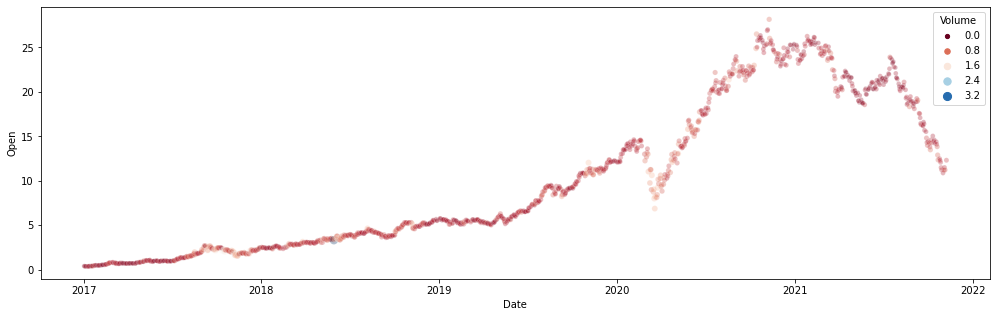

In [86]:
plt.figure(figsize=(17,5))
ax = sns.scatterplot(
    x=df_mg.index,
    y=df_mg['Open'],
    hue=df_mg['Volume'],
    size=df_mg['Volume'],
    palette='RdBu',
    alpha=0.3
)

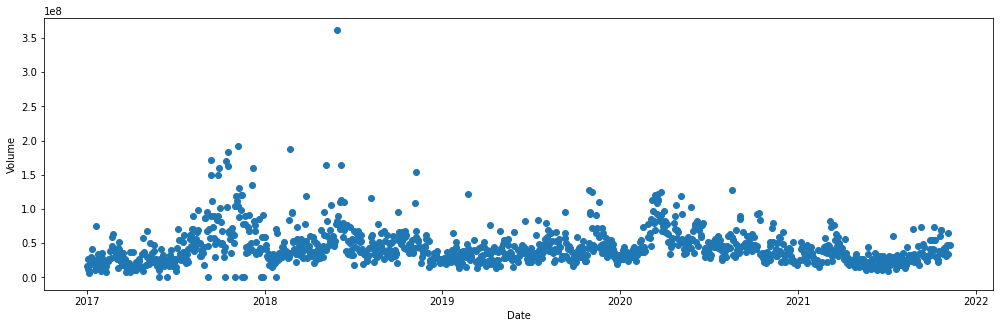

<AxesSubplot:xlabel='Date'>

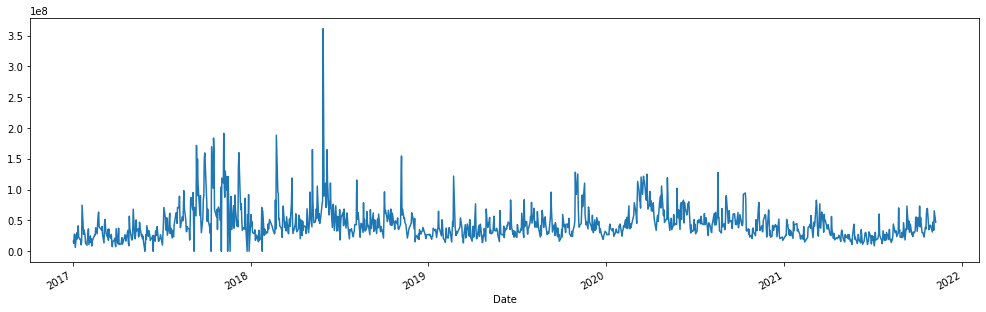

In [89]:
vol_mg = df_mg['Volume']
plt.figure(figsize=(17,5))
plt.scatter(df_mg.index, vol_mg)

plt.xlabel('Date')
plt.ylabel('Volume')
plt.show();
df_mg.Volume.plot(figsize=(17,5))

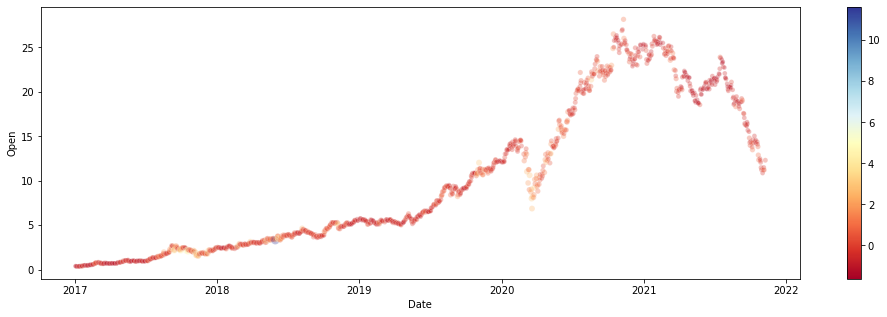

In [77]:
# 25
# normalizar = subtrair a média e dividir pelo desvio padrão
plot1 = df_mg.copy()
plot1['VolNorm'] = (plot1.Volume - plot1.Volume.mean()) / plot1.Volume.std() 
plt.figure(figsize=(17,5))
ax = sns.scatterplot(
    x=plot1.index,
    y=plot1['Open'],
    hue=plot1['VolNorm'],
    size=plot1['VolNorm'],
    palette='RdYlBu',
    alpha=0.3
)

norm = plt.Normalize(plot1['VolNorm'].min(),plot1['VolNorm'].max())
sm = plt.cm.ScalarMappable(cmap='RdYlBu', norm=norm)
sm.set_array([])
ax.get_legend().remove()
ax.figure.colorbar(sm)

<AxesSubplot:xlabel='Date'>

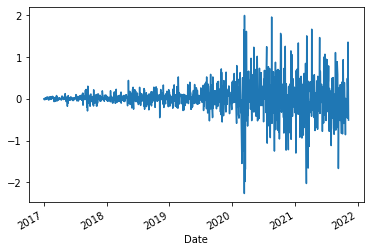

In [78]:
# 26
(df_mg['Close'] - df_mg['Close'].shift()).plot()

<AxesSubplot:xlabel='Close', ylabel='Close'>

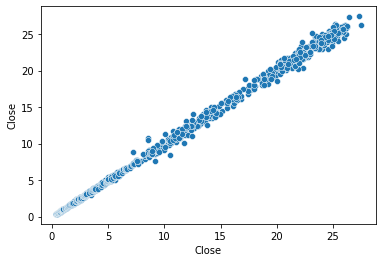

In [79]:
sns.scatterplot(x=df_mg['Close'], y=df_mg['Close'].shift())

<AxesSubplot:xlabel='Close', ylabel='Close'>

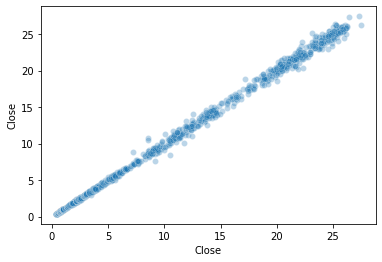

In [82]:
sns.scatterplot(x=df_mg['Close'], y=df_mg['Close'].shift(), alpha=0.3)

<AxesSubplot:xlabel='Close', ylabel='Close'>

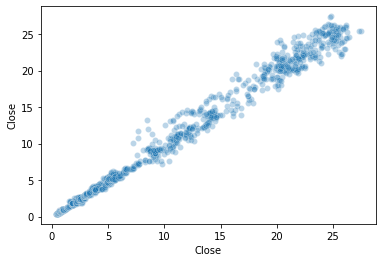

In [83]:
# Gráfico para 1 semana
sns.scatterplot(x=df_mg['Close'], y=df_mg['Close'].shift(7), alpha=0.3)

In [ ]:
df.mg.reindex(new_index).head(10)

In [ ]:
# 28
df_mg_filled = df.mg.reindex(new_index)

# Janelas deslizantes

In [ ]:
# 29
# 30 dias
df_mg_filled.Close.rolling(windows='30D').mean().plot(figsize=(17,5))
# 7 dias
# df_mg_filled.Close.rolling(windows='7D').mean().plot(figsize=(17,5))
df_mg_filled.Close.plot(alpha=0.5)


In [ ]:
# 30

# 30 dias
df_mg_filled.Close.rolling(windows='30D').mean().plot(figsize=(17,5), style='k:', label)
# 7 dias
# df_mg_filled.Close.rolling(windows='7D').mean().plot(figsize=(17,5))
df_mg_filled.Close.plot(alpha=0.5)


In [ ]:
# 31
# entropia = muitas eventos aleatórios ("Surpresas") alta variação da variancia é dificil de prever


In [ ]:
# 32

In [ ]:
# 33

**https://en.wikipedia.org/wiki/Approximate_entropy**

# Taxa de retorno

**Taxa de retorno**

- retorno de um período único

$$ r_t = \frac{P_t}{P_{t-1}}$$

- retorno de vários períodos
$$ R_T = (1 + r_1)(1 + r_2)...(1 + r_T) - 1 $$

In [ ]:
# 34

In [ ]:
# 35

In [ ]:
# 36

In [ ]:
# 37

In [ ]:
# 38

- retorno de vários períodos
$$ R_T = (1 + r_1)(1 + r_2)...(1 + r_T) - 1 $$

In [ ]:
# 39

In [ ]:
# 40

In [ ]:
# 41

In [ ]:
# 42

In [ ]:
# 43

In [ ]:
# 44

## Decomposição de séries temporais

Uma série temporal pode ser decomposta nos seguintes componentes:

- **Tendência (T)**: indica o seu comportamento ao longo do tempo, ou seja, se é crescente, decrescente ou estável. Além disso indica a velocidade destas mudanças. 

<br>

- **Ciclos (C)**: são  oscilações de subida e de queda nas séries, de forma suave e repetida, ao longo da componente de tendência. Os movimentos cíclicos tendem a ser irregulares.

<br>

- **Sazonalidade (S)**: são oscilações de subida e de queda que sempre ocorrem em um determinado período do ano, do mês, da semana ou do dia. Os movimentos facilmente previsíveis, ocorrendo em intervalos regulares de tempo. A partir da sazonalidade pode-se classificar uma série temporal em aditiva ou multiplicativa. Uma **série é aditiva** se a magnitude da **sazonalidade mantem-se constante** ao longo do prazo. A série é denominada **multiplicativa** se ao longo do tempo a **amplitude da sazonalidade aumenta**.

<br>


- **Ruído Aleatório ($\epsilon$)**: ou erro no período **t** são variações irregulares ou flutuações inexplicáveis, resultado de fatos fortuitos e inesperados.
<br>

**Exemplo 1**: Esta série é referente à quantidade de passageiros na Airline. Note que a tendência também é crescente e sazonal. Com o decorrer do tempo a quantidade de passageiros que viajam pela companhia aérea aumenta (eixo y), porém a periodicidade da sazonalidade continua marcada no gráfico. Trata-se de uma série com sazonalidade multiplicativa. Neste caso, a quantidade de passageiros a cada período sazonal aumenta.

![](https://s3-sa-east-1.amazonaws.com/lcpi/9a0420ad-f498-4d2e-9a2b-28a224ccbdf5.png)

**Exemplo 2**: No exemplo abaixo é representado a média da temperatuda diária em uma determinada cidade ao longo de 1 ano. Note que a série é estável (não possui tendência crescente tampouco decrescente), é sazonal aditiva (possui periodicidade bem marcada e sem grande variação na amplitude).

![](https://s3-sa-east-1.amazonaws.com/lcpi/ec935a3f-daf0-4fff-a99f-5bc3c2a906d3.png)

Em outras palavras, uma série temporal $Z(t)$ pode ser reconstruída atrvés de uma função que depende das componentes acima $f(T_t,C_t,S_t,\epsilon_t)$. Uma série aditiva é representada por $Z(t)=T_t+C_t+S_t+\epsilon_t$, equanto a multiplicativa é dada por $Z(t)=T_t \times C_t \times  S_t \times \epsilon_t$

`!pip install statsmodels`

In [ ]:
# 45

In [ ]:
# 46

In [ ]:
# 47

In [ ]:
# 48

In [ ]:
# 49

In [ ]:
# 50

In [ ]:
# 51

In [ ]:
# 52